COMP5930M Scientific Computation - Tutorial 2  \\
Bisection method

A basic implementation of the bisection method consists of:

1.   Loop that terminates once one of the two stopping conditions are satisfied.
2.   Evaluation of the function at the midpoint of the current bracket.
3.   Test to see which of the two sub-brackets satisfy the bracket condition.
4.   Update of the bracket endpoints
5.   Output of the final converged value of $x$

In [ ]:
def bisection(fnon, xL, xR, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # xL,xR    - initial bracket [xL,xR]
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)

    k = 0
    iterates = []

    print(' k  xk          f(xk)')

    # Main bisection loop
    while ((xR - xL) > tol and k < maxk):
        xC = (xL + xR) / 2
        iterates.append(xC)

        fL = eval(fnon)(xL,*fnonargs)
        fR = eval(fnon)(xR,*fnonargs)
        fC = eval(fnon)(xC,*fnonargs)

        if (abs(fC) < tol):
            break
        elif (fL * fC < 0):
            xR = xC
            fR = fC
        else:
            xL = xC
            fL = fC

        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, xC, abs(fC)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

    return iterates;


def myNewton(fnon, dfdx, x0, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # dfdx     - name of the derivative function df(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0
    f = eval(fnon)(x,*fnonargs)
    iterates = []
    iterates.append(x)

    print(' k  xk          f(xk)')

    # Main Newton loop
    while (abs(f) > tol and k < maxk):
        # Evaluate function derivative
        d = eval(dfdx)(x,*fnonargs)

        # Take Newton step
        x = x - f/d
        f = eval(fnon)(x,*fnonargs)
        iterates.append(x)

        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, x, abs(f)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

    return iterates;

Define the cantilever function and its derivative.

In [ ]:
def cantilever(x,d):
    # Define function f(x) = x^4 - 4 x^3 + 6 x^2 - 3 d
    return (x**4 - 4*x**3 + 6*x**2 - 3*d)

def dCantilever(x,R):
    # Define function df(x) = 4 x^3 - 12 x^2 + 12 x
    return (4*x**3 - 12*x**2 + 12*x)

Plot the function $f(x) = x^4 - 4 x^3 + 6 x^2 - 3 d$:

Text(0, 0.5, 'f(x)')

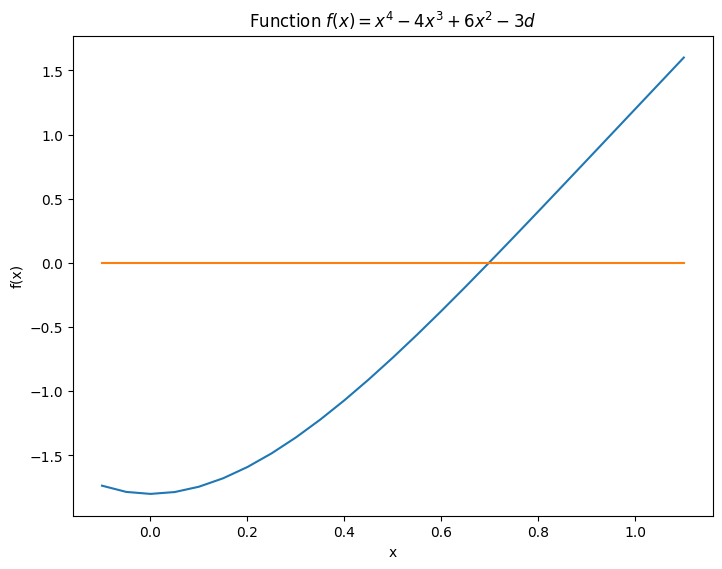

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x=np.arange(-0.1, 1.1, 0.05)
y=cantilever(x,0.6)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.plot(x,0*y)
ax.set_title('Function $f(x) = x^4 - 4 x^3 + 6 x^2 - 3 d$')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

Call bisection() to solve for the cantilever problem:

In [ ]:
bisection('cantilever', 0, 1, 1e-6, 100, 0.6)

 k  xk          f(xk)
 1  0.50000000  7.37e-01
 2  0.75000000  2.04e-01
 3  0.62500000  2.80e-01
 4  0.68750000  4.05e-02
 5  0.71875000  8.13e-02
 6  0.70312500  2.03e-02
 7  0.69531250  1.01e-02
 8  0.69921875  5.06e-03
 9  0.69726562  2.54e-03
10  0.69824219  1.26e-03
11  0.69775391  6.39e-04
12  0.69799805  3.11e-04
13  0.69787598  1.64e-04
14  0.69793701  7.32e-05
15  0.69790649  4.55e-05
16  0.69792175  1.38e-05
17  0.69791412  1.59e-05
18  0.69791794  1.03e-06
19  0.69791985  6.39e-06
20  0.69791889  2.68e-06
Converged


Compared to Newton's method, the bisection method takes many more iterations (linear vs. quadratic convergence order).

In [ ]:
myNewton('cantilever', 'dCantilever', 0.1, 1e-6, 100, 0.6)

 k  xk          f(xk)
 1  1.70876384  4.29e+00
 2  0.91833881  8.73e-01
 3  0.69986991  7.59e-03
 4  0.69791873  2.07e-06
 5  0.69791820  1.55e-13
Converged


In [ ]:
import numpy

def naca0012(x,th):
    # Define function f(x) =
    y = -0.1015*x**4 + 0.2843*x**3 - 0.3516*x**2 - 0.126*x + 0.2969*numpy.sqrt(x)
    return (2*y - th)

def dNaca0012(x,th):
    # Define function df(x) =
    dy = -4*0.1015*x**3 + 3*0.2843*x**2 - 2*0.3516*x - 0.126 + 0.5*0.2969/numpy.sqrt(x)
    return (2*dy)

Text(0, 0.5, 'f(x)')

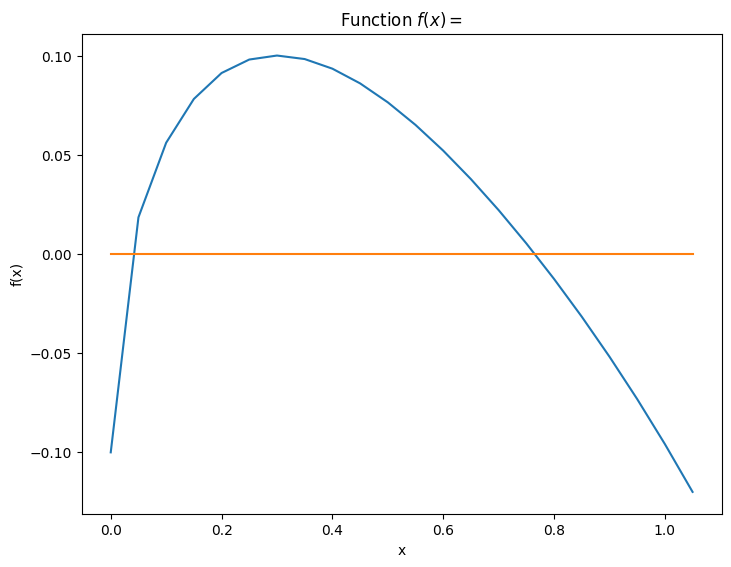

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x=np.arange(0, 1.1, 0.05)
y=naca0012(x, 0.1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.plot(x,0*y)
ax.set_title('Function $f(x) = $')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

Call bisection() to solve for the airfoil problem:

In [ ]:
xk = bisection('naca0012', 0.6, 1, 1e-6, 100, 0.1);

 k  xk          f(xk)
 1  0.80000000  1.26e-02
 2  0.70000000  2.21e-02
 3  0.75000000  5.34e-03
 4  0.77500000  3.47e-03
 5  0.76250000  9.71e-04
 6  0.76875000  1.24e-03
 7  0.76562500  1.33e-04
 8  0.76406250  4.20e-04
 9  0.76484375  1.43e-04
10  0.76523438  5.22e-06
11  0.76542969  6.39e-05
12  0.76533203  2.93e-05
13  0.76528320  1.21e-05
14  0.76525879  3.42e-06
Converged


Convergence of Newton from different initial guesses. The number of iterations depends on the steepness of the function near the iterates. For one initial guess the derivative becomes zero and the iteration fails.

In [ ]:
myNewton('naca0012', 'dNaca0012', 0.1, 1e-6, 100, 0.1);
myNewton('naca0012', 'dNaca0012', 0.2, 1e-6, 100, 0.1);
myNewton('naca0012', 'dNaca0012', 0.3, 1e-6, 100, 0.1);
myNewton('naca0012', 'dNaca0012', 0.4, 1e-6, 100, 0.1);
myNewton('naca0012', 'dNaca0012', 0.5, 1e-6, 100, 0.1);

 k  xk          f(xk)
 1  0.00027783  9.02e-02
 2  0.00541297  5.77e-02
 3  0.02069333  2.01e-02
 4  0.03195831  2.60e-03
 5  0.03386256  4.81e-05
 6  0.03389912  1.68e-08
Converged
 k  xk          f(xk)
 1  -0.27441644  nan
Converged
 k  xk          f(xk)
 1  386.26159553  4.49e+09
 2  289.87108499  1.42e+09
 3  217.57814261  4.49e+08
 4  163.35835522  1.42e+08
 5  122.69340493  4.50e+07
 6  92.19454188  1.42e+07
 7  69.32018722  4.50e+06
 8  52.16413269  1.42e+06
 9  39.29668625  4.51e+05
10  29.64552482  1.43e+05
11  22.40632332  4.51e+04
12  16.97570953  1.43e+04
13  12.90095284  4.52e+03
14  9.84218587  1.43e+03
15  7.54399791  4.54e+02
16  5.81401123  1.44e+02
17  4.50662144  4.59e+01
18  3.51049917  1.48e+01
19  2.73877568  4.82e+00
20  2.12131672  1.62e+00
21  1.60082823  5.55e-01
22  1.14930039  1.73e-01
23  0.84650549  3.02e-02
24  0.76903885  1.34e-03
25  0.76525808  3.17e-06
26  0.76524912  1.78e-11
Converged
 k  xk          f(xk)
 1  1.15252726  1.75e-01
 2  0.84792152  3.

<ipython-input-7-3b7e4af03622>:5: RuntimeWarning: invalid value encountered in sqrt
  y = -0.1015*x**4 + 0.2843*x**3 - 0.3516*x**2 - 0.126*x + 0.2969*numpy.sqrt(x)


In [ ]:
def squareRoot(x):
    # Define function f(x) = x^2 - 2
    return (x*x - 2)

def dSquareRoot(x):
    # Define function df(x) = 2x
    return (2*x)

Find $\sqrt{2}$ using the bisection method and plot the convergence of the error $e_k := |x_k - \sqrt{2}|$:

 k  xk          f(xk)
 1  1.50000000  2.50e-01
 2  1.25000000  4.38e-01
 3  1.37500000  1.09e-01
 4  1.43750000  6.64e-02
 5  1.40625000  2.25e-02
 6  1.42187500  2.17e-02
 7  1.41406250  4.27e-04
 8  1.41796875  1.06e-02
 9  1.41601562  5.10e-03
10  1.41503906  2.34e-03
11  1.41455078  9.54e-04
12  1.41430664  2.63e-04
13  1.41418457  8.20e-05
14  1.41424561  9.06e-05
15  1.41421509  4.31e-06
16  1.41419983  3.88e-05
17  1.41420746  1.73e-05
18  1.41421127  6.47e-06
19  1.41421318  1.08e-06
20  1.41421413  1.62e-06
21  1.41421366  2.69e-07
22  1.41421342  4.06e-07
23  1.41421354  6.85e-08
24  1.41421360  1.00e-07
25  1.41421357  1.58e-08
26  1.41421355  2.63e-08
27  1.41421356  5.24e-09
28  1.41421356  5.30e-09
29  1.41421356  3.15e-11
30  1.41421356  2.60e-09
31  1.41421356  1.29e-09
32  1.41421356  6.27e-10
33  1.41421356  2.98e-10
34  1.41421356  1.33e-10
35  1.41421356  5.08e-11
36  1.41421356  9.61e-12
37  1.41421356  1.10e-11
Converged


Text(0, 0.5, 'Error $e_k = |x_k - \\sqrt{2}|$')

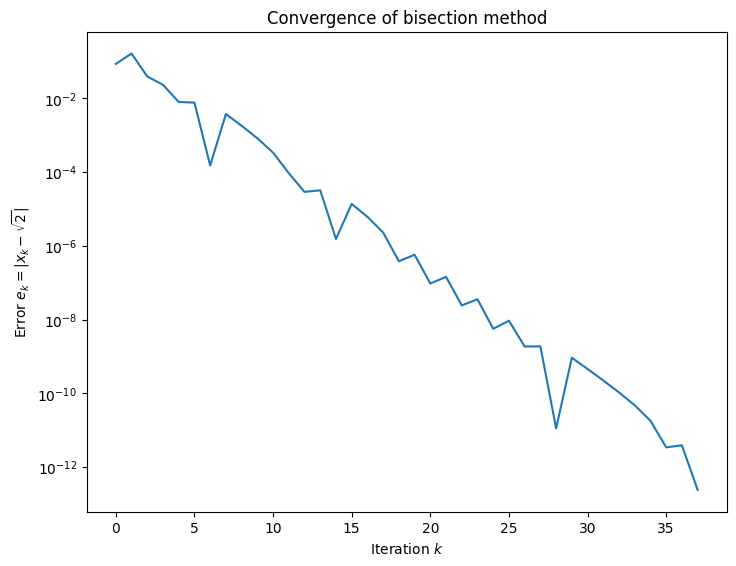

In [ ]:
import math

xk = bisection('squareRoot', 1, 2, 1e-12, 1001);
ek = xk

for k in range(0, len(xk)):
  ek[k] = abs(xk[k] - math.sqrt(2))

from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
k=np.arange(0, len(xk))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.semilogy(k,ek)
ax.set_title('Convergence of bisection method')
ax.set_xlabel('Iteration $k$')
ax.set_ylabel('Error $e_k = |x_k - \sqrt{2}|$')

We can observe that the error converges linearly, which graphically resembles a straight line in a semi-logarithmic plot. The slope of this line is the convergence rate ($r=1/2$).

To analyse the converge order $q$ of Newton's method, we can numerically compute the ratio

$\alpha_k = \frac{e_{k+1}}{e_k^q}$

for different values of $q$. For the appropriate convergence order $q=2$, this ratio converges to a finite value greater than 0.

If the ratio $\alpha_k$ converges to 0, the chosen value of $q$ was too small.

If the ratio $\alpha_k$ grows without bound, the chosen value of $q$ was too large.

 k  xk          f(xk)
 1  1.50000000  2.50e-01
 2  1.41666667  6.94e-03
 3  1.41421569  6.01e-06
 4  1.41421356  4.51e-12
 5  1.41421356  4.44e-16
Converged
[0.2499999999999998, 0.33333333333333104, 0.35294117646827655, 0.3535223844872458, 0.0]


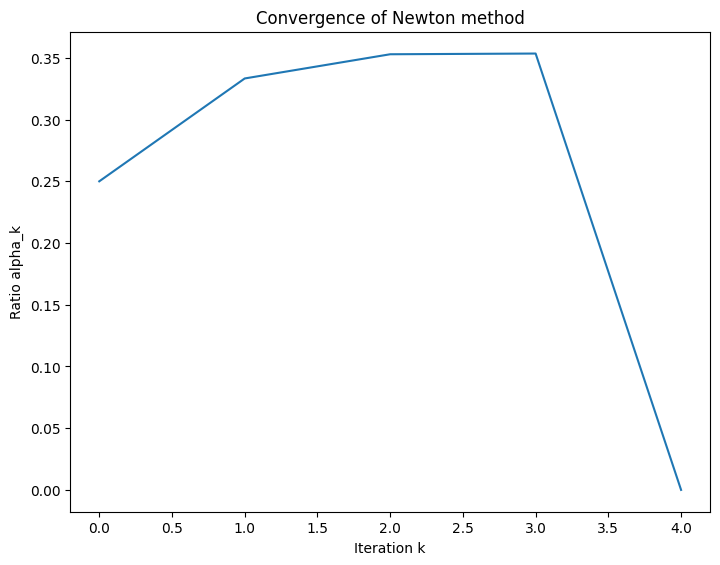

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

xk = myNewton('squareRoot', 'dSquareRoot', 2, 1e-12, 100);
ek = xk
alpha = []

q = 2

for k in range(0, len(xk)):
  ek[k] = abs(xk[k] - math.sqrt(2))

for k in range(0, len(xk)-1):
 alpha.append(ek[k+1] / pow(ek[k],q))

%matplotlib inline
k=np.arange(0, len(xk)-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(k,alpha)
ax.set_title('Convergence of Newton method')
ax.set_xlabel('Iteration k')
ax.set_ylabel('Ratio alpha_k')

print(alpha)